In [29]:
# Libraries Import

# pandas
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from sklearn import svm

In [30]:
# get input files as a DataFrame
train_df = pd.read_csv("../input/train.csv")
test_df  = pd.read_csv("../input/test.csv")

### Preview

In [31]:
train_df.info()
print('-----------------------------------------------')
test_df.info()

train_df.shape
test_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


(28000, 784)

In [32]:
train_df.head(5)
#test_df.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### take a fraction of the samples

In [33]:
fraction = train_df[0:5000]
fraction_test = train_df[5000:6000]
#fraction

In [34]:
fraction_img = fraction.iloc[:, 1 : 785]
fraction_label = fraction.iloc[:, 0]
test_img = fraction_test.iloc[:, 1 : 785]
test_label = fraction_test.iloc[:, 0]

### visualisation

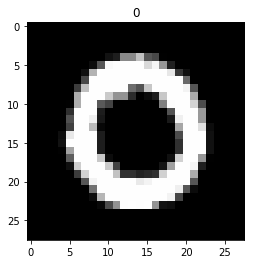

In [35]:
i = 1
img=fraction_img.iloc[i, :].as_matrix()
img=img.reshape((28, 28))
plt.imshow(img, cmap='gray')
plt.title(fraction.iloc[i, 0])

(array([ 566.,   17.,   12.,   11.,    3.,    9.,    9.,   11.,    7.,  139.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

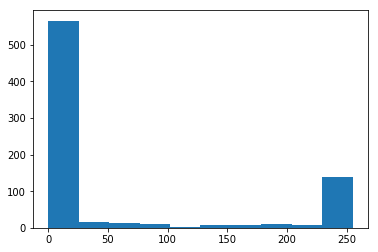

In [36]:
plt.hist(fraction.iloc[i, 1 : 785])

In [37]:
clf = svm.SVC()
clf.fit(fraction_img, fraction_label.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
clf.score(test_img[:500], test_label[:500])

0.104

/Users/tlenglin/Library/Python/3.4/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/tlenglin/Library/Python/3.4/lib/python/site-packages/pandas/core/frame.py:2366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
/Users/tlenglin/Library/Python/3.4/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

(array([ 687.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,   97.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

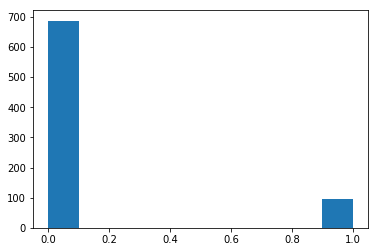

In [39]:
fraction_img[fraction_img > 0] = 1
test_img[test_img > 0] = 1
#fraction_img.shape
plt.hist(fraction_img.iloc[0])

In [40]:
clf = svm.SVC()
clf.fit(fraction_img, fraction_label.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
clf.score(test_img[:500], test_label[:500])

0.90600000000000003

## Now with Deep Neural Network
restart everything

In [2]:
#import phase
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import tensorflow as tf


In [29]:
#reading the inputs
data = pd.read_csv('../input/train.csv')
print('data({0[0]},{0[1]})'.format(data.shape))
print (data.head())

data(42000,785)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0   

In [32]:
#we keep only the img
images = data.iloc[:, 1:].values
images = images.astype(np.float)

images = np.multiply(images, 1.0 / 255.0)
print('images({0[0]},{0[1]})'.format(images.shape))

#labels are put aside
labels_flat = data.iloc[:, [0]].values.ravel()
print('labels_flat({0})'.format(len(labels_flat)))
print ('labels_flat[{0}] => {1}'.format(10,labels_flat[10]))

images(42000,784)
labels_flat(42000)
labels_flat[10] => 8


In [33]:
#preview
print('data({0[0]}, {0[1]})'.format(data.shape))
data.head()

#how many different labels ?
labels_count = np.unique(labels_flat).shape[0]
print('labels_count => {0}'.format(labels_count))

data(42000, 785)
labels_count => 10


### display one image
we know it is a 28 * 28 px

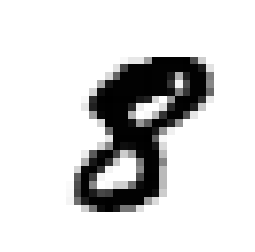

In [6]:
def display(img):
    one_image = img.reshape(28, 28)
    plt.axis('off')
    plt.imshow(one_image, cmap=cm.binary)
    
display(images[10]) #displaying img n10

### convert class label into one-hot vector

In [34]:
def dense_to_one_hot(labels_dense, num_classes):
    #print('labels_dense.shape[0] = {0}'.format(labels_dense.shape[0]))
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    #print('index_offset = {0}'.format(index_offset))
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot

labels = dense_to_one_hot(labels_flat, labels_count)
labels = labels.astype(np.uint8)

print('labels({0[0]},{0[1]})'.format(labels.shape))
print ('labels[{0}] => {1}'.format(10,labels[10]))

labels(42000,10)
labels[10] => [0 0 0 0 0 0 0 0 1 0]


### data is ready

In [37]:
#weight initialization
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev = 0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape = shape)
    return tf.Variable(initial)

In [38]:
#convolution
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

#pooling
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [40]:
#input and output of NN
x = tf.placeholder('float', shape=[None, 784]) #image size = 784 px
y_ = tf.placeholder('float', shape=[None, labels_count])

In [41]:
# first convolutional layer
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

image = tf.reshape(x, [-1, 28, 28, 1])
print(image.get_shape())

h_conv1 = tf.nn.relu(conv2d(image, W_conv1) + b_conv1)
print(h_conv1.get_shape())
h_pool1 = max_pool_2x2(h_conv1)
print(h_pool1.get_shape())

layer1 = tf.reshape(h_conv1, (-1, 28, 28, 4, 8)) #img height and width = 28, display in 4 by 8 grid
layer1 = tf.transpose(layer1, (0, 3, 1, 4, 2))
layer1 = tf.reshape(layer1, (-1, 28 * 4, 28 * 8))

(?, 28, 28, 1)
(?, 28, 28, 32)
(?, 14, 14, 32)


In [42]:
# second layer
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

layer2 = tf.reshape(h_conv2, (-1, 14, 14, 4, 16)) #display in grid 4 by 16
layer2 = tf.transpose(layer2, (0, 3, 1, 4, 2))
layer2 = tf.reshape(layer2, (-1, 14 * 4, 14 * 16))

In [43]:
#densely connected layer
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [44]:
#dropout
keep_prob = tf.placeholder('float')
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [45]:
#readout layer for deep net, doing a kind of softmax regression
W_fc2 = weight_variable([1024, labels_count])
b_fc2 = bias_variable([labels_count])

y = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

In [46]:
# cost function
cross_entropy = -tf.reduce_sum(y_ * tf.log(y))

#optimisation, kind of gradient descent
train_step = tf.train.AdamOptimizer(0.0001).minimize(cross_entropy) # learning rate = 0.0001

#evaluation
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

In [47]:
#prediction function
predict = tf.argmax(y, 1)

## Training step
using batchs to save time

In [48]:
#we will work with 40000 images for now and save 2000 for validation
train_images = images[2000:]
train_labels = labels[2000:]

validation_images = images[:2000]
validation_labels = labels[:2000]
print('train_images({0[0]},{0[1]})'.format(train_images.shape))
print('validation_images({0[0]},{0[1]})'.format(validation_images.shape))

train_images(40000,784)
validation_images(2000,784)


In [49]:
epochs_completed = 0
index_in_epoch = 0
num_examples = train_images.shape[0]

# serve data by batches
def next_batch(batch_size):
    
    global train_images
    global train_labels
    global index_in_epoch
    global epochs_completed
    
    start = index_in_epoch
    index_in_epoch += batch_size
    
    # when all trainig data have been already used, it is reorder randomly    
    if index_in_epoch > num_examples:
        # finished epoch
        epochs_completed += 1
        # shuffle the data
        perm = np.arange(num_examples)
        np.random.shuffle(perm)
        train_images = train_images[perm]
        train_labels = train_labels[perm]
        # start next epoch
        start = 0
        index_in_epoch = batch_size
        assert batch_size <= num_examples
    end = index_in_epoch
    return train_images[start:end], train_labels[start:end]

In [50]:
#start TensorFlow session
init = tf.initialize_all_variables()
sess = tf.InteractiveSession()

sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [51]:
#visualisation variables
#train_accuracies = []
#validation_accuracies = []
#x_range = []

#display_step = 1

#for i in range (2500) : #num of training iterations
    #get new batch
#    batch_xs, batch_ys = next_batch(50) #batch size = 50
    
    #check progress
#    if i%display_step == 0 or (i + 1) == 2500 :
#        train_accuracy = accuracy.eval(feed_dict={x:batch_xs, y_ : batch_ys, keep_prob : 1.0})
#        if (2000) :
#            validation_accuracy = accuracy.eval(feed_dict = {x : validation_images[0 : 50], y_ : validation_labels[0 : 50], keep_prob : 1.0})
#            print('training_accuracy / validation_accuracy => %.2f / %.2f for step %d'%(train_accuracy, validation_accuracy, i))
#            validation_accuracies.append(validation_accuracy)
#        else :
#            print('training_accuracy => %.4f for step %d'%(train_accuracy, i))
#        train_accuracies.append(train_accuracy)
#        x_range.append(i)
        
        #increase display_step
#        if i%(display_step * 10) == 0 and i :
#            display_step *= 10
    #train on batch
#    sess.run(train_step, feed_dict={x: batch_xs, y_ : batch_ys, keep_prob : 0.5}) # dropout = 0.5
    
    
# visualisation variables
train_accuracies = []
validation_accuracies = []
x_range = []

display_step=1

for i in range(2500):

    #get new batch
    batch_xs, batch_ys = next_batch(50)        

    # check progress on every 1st,2nd,...,10th,20th,...,100th... step
    if i%display_step == 0 or (i+1) == 2500:
        
        train_accuracy = accuracy.eval(feed_dict={x:batch_xs, 
                                                  y_: batch_ys, 
                                                  keep_prob: 1.0})       
        if(2000):
            validation_accuracy = accuracy.eval(feed_dict={ x: validation_images[0:50], 
                                                            y_: validation_labels[0:50], 
                                                            keep_prob: 1.0})                                  
            print('training_accuracy / validation_accuracy => %.2f / %.2f for step %d'%(train_accuracy, validation_accuracy, i))
            
            validation_accuracies.append(validation_accuracy)
            
        else:
             print('training_accuracy => %.4f for step %d'%(train_accuracy, i))
        train_accuracies.append(train_accuracy)
        x_range.append(i)
        
        # increase display_step
        if i%(display_step*10) == 0 and i:
            display_step *= 10
    # train on batch
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys, keep_prob: 0.5})

training_accuracy / validation_accuracy => 0.04 / 0.10 for step 0
training_accuracy / validation_accuracy => 0.06 / 0.02 for step 1
training_accuracy / validation_accuracy => 0.12 / 0.06 for step 2
training_accuracy / validation_accuracy => 0.08 / 0.10 for step 3
training_accuracy / validation_accuracy => 0.20 / 0.14 for step 4
training_accuracy / validation_accuracy => 0.20 / 0.18 for step 5
training_accuracy / validation_accuracy => 0.22 / 0.18 for step 6
training_accuracy / validation_accuracy => 0.16 / 0.18 for step 7
training_accuracy / validation_accuracy => 0.14 / 0.18 for step 8
training_accuracy / validation_accuracy => 0.14 / 0.18 for step 9
training_accuracy / validation_accuracy => 0.16 / 0.24 for step 10
training_accuracy / validation_accuracy => 0.30 / 0.40 for step 20
training_accuracy / validation_accuracy => 0.48 / 0.52 for step 30
training_accuracy / validation_accuracy => 0.56 / 0.60 for step 40
training_accuracy / validation_accuracy => 0.66 / 0.64 for step 50
train

validation_accuracy => 0.9835


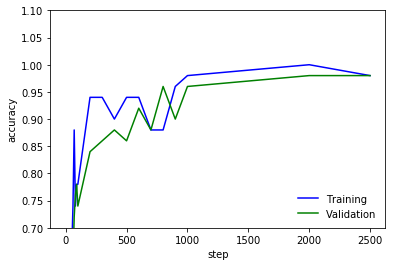

In [53]:
if (2000):
    validation_accuracy = accuracy.eval(feed_dict={x: validation_images, y_: validation_labels, keep_prob: 1.0})
    print('validation_accuracy => %.4f' %validation_accuracy)
    plt.plot(x_range, train_accuracies, '-b', label='Training')
    plt.plot(x_range, validation_accuracies, '-g', label='Validation')
    plt.legend(loc='lower right', frameon=False)
    plt.ylim(ymax = 1.1, ymin = 0.7)
    plt.ylabel('accuracy')
    plt.xlabel('step')
    plt.show

## Submission

predicted_labels(28000)
predicted_labels[10] => 5.0


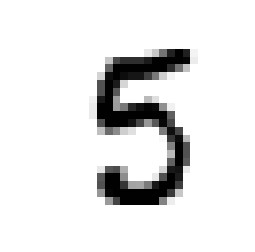

In [58]:
test_images = pd.read_csv('../input/test.csv').values
test_images = test_images.astype(np.float)
test_images = np.multiply(test_images, 1.0 / 255.0)

predicted_labels = np.zeros(test_images.shape[0])
for i in range (0, test_images.shape[0]//50):
    predicted_labels[i * 50 : (i + 1) * 50] = predict.eval(feed_dict={x: test_images[i * 50 : (i + 1) * 50], keep_prob:1})
print('predicted_labels({0})'.format(len(predicted_labels)))

display(test_images[10])
print('predicted_labels[{0}] => {1}'.format(10, predicted_labels[10]))

np.savetxt('submission_file.csv', np.c_[range(1, len(test_images) + 1), predicted_labels], delimiter = ',', header = 'ImagesID,Label', comments = '', fmt = '%d')


## More visualisation
output of the first convolution layer, 32 features into an image grid

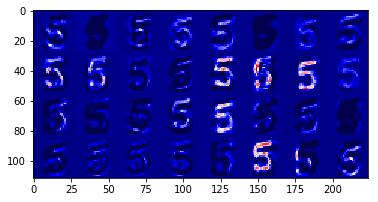

In [60]:
layer1_grid = layer1.eval(feed_dict={x:test_images[10:10 + 1], keep_prob : 1.0})
plt.axis = 'off'
plt.imshow(layer1_grid[0], cmap= cm.seismic)

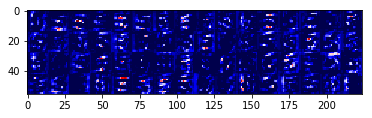

In [64]:
layer2_grid = layer2.eval(feed_dict={x:test_images[10:10 + 1], keep_prob : 1.0})
plt.axis = 'off'
#plt.figure(figsize=(20, 10))
plt.imshow(layer2_grid[0], cmap= cm.seismic)